In [ ]:
!pip3 install opencv-python # opencv 설치하는 코드

### ✅ 이미지

In [12]:
import cv2

img = cv2.imread('Handle.png', -1) # 첫번째 입력값 : 경로를 포함한 이미지 정보
                                  # 두번째 입력값 : 0, 1, -1 -> 이미지를 읽는 방식
                                  # 0 : 흑백 / 1 :컬러 / -1 : 원래 이미지의 상태(원본)

# print(img)

print(type(img))

<class 'numpy.ndarray'>


In [4]:
import ipywidgets

ipywidgets.Audio()

Audio(value=b'')

In [13]:
import ipywidgets # 파이썬에서 위젯을 사용할 수 있는 라이브러리

from IPython.display import display # 실제 이미지를 display할 수 있는 라이브러리

img_widget = ipywidgets.Image(format = 'png')

cv2.imencode('.png', img) # 리스트 형태로 출력
                          # -> 0번 인덱스 -> 결과 값이 있으면 true / or false,
                          # -> 1번 인덱스 -> 실제 데이터

img_widget.value = cv2.imencode('.png', img)[1].tostring()

display(img_widget)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x02\x14\x08\x02\x00\x00\x00\xbcL\x8c…

### ✅ 동영상

In [1]:
import cv2
import ipywidgets as widgets # 파이썬 위젯 만들기

from IPython.display import display # 실제 이미지를 display할 수 있는 라이브러리

cap = cv2.VideoCapture('pedestrians.mp4') # 동영상 파일 불러와서 비디오 객체 생성(capture) -> capture(동영상을 캡쳐캡쳐해서 확인)

print(cap.isOpened()) # True -> 정상적으로 불러와졌다

True


In [4]:
import time

if cap.isOpened():
#     print(cap.read())
    ret, img = cap.read() # ret -> cap 객체를 순차적으로 읽어서 저장, 읽을게 있다면 True / or False
    
    while ret: # ret == True
        img_widget.value = cv2.imencode(".jpeg", img)[1].tostring() # 배열의 형태를 문자열로!
        time.sleep(0.05)
        
        ret, img = cap.read() # 반복문이 끝나기 전 프레임을 다시 받아들일건지 결정
cap.release()

In [3]:
img_widget = widgets.Image()
display(img_widget)

Image(value=b'')

### ✅ OpenCV 활용해서 이미지에 도형 그리기, 글씨 쓰기
- 선, 원, 직선, 텍스트
- 색깔의 배열 순서가 RGB가 아닌 BGR이다!
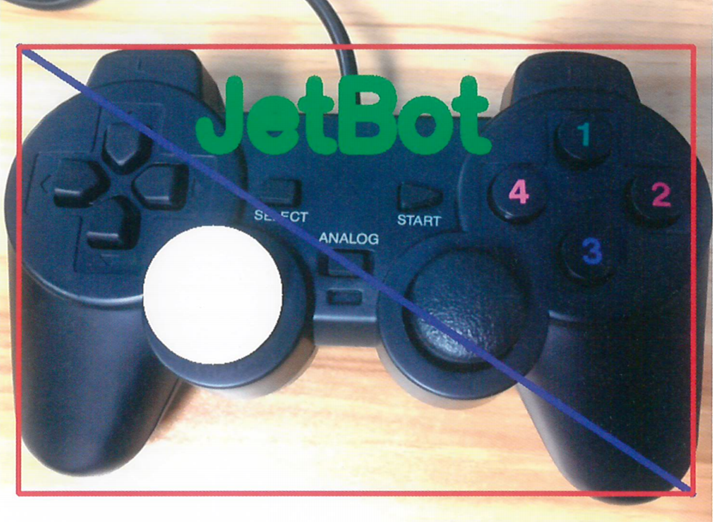

In [2]:
import cv2

img = cv2.imread('Handle.png', -1)

In [3]:
import ipywidgets

from IPython.display import display

img_widget = ipywidgets.Image(format = 'png')

cv2.imencode('.png', img)

img_widget.value = cv2.imencode('.png', img)[1].tostring()

display(img_widget)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x02\x14\x08\x02\x00\x00\x00\xbcL\x8c…

In [10]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.9 MB 17 kB/s  eta 0:00:01    |█▍                              | 1.6 MB 2.7 MB/s eta 0:00:14     |██████████████▏                 | 16.8 MB 973 kB/s eta 0:00:22     |████████████████                | 19.0 MB 176 kB/s eta 0:01:48
     |████████████████████████████████| 77 kB 972 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 516 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 1.6 MB/s eta 0:00:01
  Created wheel for matplotlib: filename=matplotlib-3.3.4-cp36-cp36m-linux_aarch64.whl size=9967802 sha256=c34b6fcc4c5ce7d86f29f5d3e1667afb0fb82a056a0520e92d9e95cb2cfa7924
  Stored in directory: /home/jetbot/.cache/pip/wheels/09/f4/84/841a4c463638ce3204dcb7137673efe82f22fba82544946b1f
Successfully built matplotlib
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


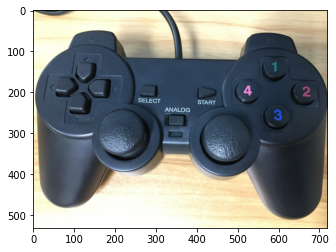

In [4]:
import matplotlib.pyplot as plt

img = cv2.imread('Handle.png', 1)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # RGB -> BGR

plt.imshow(img)

In [11]:
# x1, y1 : 좌상단 / x2, y2 : 우상단

# 1. 선 그리기 -> line(img, (x1, y1), (x2, y2), (B,G,R), 두께)

cv2.line(img, (0, 150), (700, 500), (255, 0, 0), 5)

# 2. 직사각형 그리기 -> rectangle(img, (x1, y1), (x2, y2), (B,G,R), 두께)

cv2.rectangle(img, (0, 150), (700, 500), (0, 0, 255), 3)

# 3. 원 그리기 -> circle(img, (x1, y1), (x2, y2), (B,G,R), 두께) : 음수 -> 원 채우기 / 양수 -> 외곽선

cv2.circle(img, (200, 300), 100, (255, 255, 0), -3)

# 4. 텍스트 -> putText(img "텍스트", 위치, 글씨체, 글씨크기, (B,G,R), 두께)

cv2.putText(img, 'JETBOT', (200, 150), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 3, (0, 255, 0), 10)

array([[[ 97,  92,  78],
        [ 85,  83,  76],
        [ 82,  83,  81],
        ...,
        [238, 220, 180],
        [239, 221, 181],
        [238, 220, 180]],

       [[162, 146, 113],
        [132, 119,  92],
        [107, 100,  83],
        ...,
        [239, 220, 180],
        [240, 221, 181],
        [240, 221, 181]],

       [[230, 211, 165],
        [207, 189, 148],
        [174, 157, 121],
        ...,
        [240, 221, 181],
        [240, 221, 181],
        [240, 221, 181]],

       ...,

       [[254, 255, 248],
        [254, 255, 248],
        [255, 255, 250],
        ...,
        [238, 205, 151],
        [236, 203, 149],
        [232, 199, 145]],

       [[254, 255, 249],
        [254, 254, 249],
        [254, 254, 249],
        ...,
        [235, 202, 148],
        [236, 203, 150],
        [234, 202, 148]],

       [[254, 255, 247],
        [253, 254, 246],
        [252, 254, 247],
        ...,
        [235, 202, 148],
        [233, 200, 147],
        [233, 201, 147]]

In [12]:
import ipywidgets

from IPython.display import display

img_widget = ipywidgets.Image(format = 'png')

cv2.imencode('.png', img)

img_widget.value = cv2.imencode('.png', img)[1].tostring()

display(img_widget)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x02\x14\x08\x02\x00\x00\x00\xbcL\x8c…